In [33]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pathlib import Path, PureWindowsPath

In [34]:
# we use the `Path` function from pathlib to tell python what the path looks like. If you use this code you're
# going to need to change the name after `Users` to your username!
data_2011 = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/AU Work/2011_census_files")
shp_file_path = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/SA2 Shapefiles")
corr_file = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/AU Work/2011_2016_correspondence")

In [35]:
#read in median values 
sa2_medians_11 = pd.read_csv(data_2011/'SA2_NSW/2011Census_B02_NSW_SA2_short.csv')
# Read in the sa2 Shapefile for 2016
sa2_shape16 = gpd.read_file(shp_file_path/'sa2_ucl.dbf')
sa2_shape16['SA2_MAIN16']=sa2_shape16['SA2_MAIN16'].astype(int)
# Read in the sa2 Shapefile for 2011
sa2_shape11 = gpd.read_file(shp_file_path/'SA2_2011_AUST.dbf')
sa2_shape11['SA2_MAIN'] = sa2_shape11['SA2_MAIN'].astype(int)


In [36]:
sa2_shape16.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SA2_MAIN16  265 non-null    int32   
 1   SA2_5DIG16  265 non-null    object  
 2   SA2_NAME16  265 non-null    object  
 3   SA3_CODE16  265 non-null    object  
 4   SA3_NAME16  265 non-null    object  
 5   SA4_CODE16  265 non-null    object  
 6   SA4_NAME16  265 non-null    object  
 7   GCC_CODE16  265 non-null    object  
 8   GCC_NAME16  265 non-null    object  
 9   STE_CODE16  265 non-null    object  
 10  STE_NAME16  265 non-null    object  
 11  AREASQKM16  265 non-null    float64 
 12  geometry    265 non-null    geometry
dtypes: float64(1), geometry(1), int32(1), object(10)
memory usage: 26.0+ KB


In [37]:
# Read in the sa2 Shapefile 
sa2_shape11 = gpd.read_file(shp_file_path/'SA2_2011_AUST.dbf')
sa2_shape11['SA2_MAIN'] = sa2_shape11['SA2_MAIN'].astype(int)

# # Merge shapefile with 
sa2_2011 = pd.merge(sa2_medians_11,sa2_shape11,left_on='region_id',right_on='SA2_MAIN',how='left')
sa2_2011.isnull().sum()
sa2_2011.dropna(inplace=True)

In [38]:
# Correspondence testing 
corr = pd.read_csv(corr_file/'2011_2016_corr.csv')
corr_test11 = pd.merge(sa2_2011,corr, left_on='region_id',right_on='SA2_MAINCODE_2011',how='right')

In [39]:
corr_test11.dropna(inplace=True)
corr_test11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 588
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   region_id                      589 non-null    float64 
 1   Median_age_persons             589 non-null    float64 
 2   Median_mortgage_repay_monthly  589 non-null    float64 
 3   Median_Tot_prsnl_inc_weekly    589 non-null    float64 
 4   Median_rent_weekly             589 non-null    float64 
 5   Median_Tot_fam_inc_weekly      589 non-null    float64 
 6   Average_num_psns_per_bedroom   589 non-null    float64 
 7   Median_Tot_hhd_inc_weekly      589 non-null    float64 
 8   Average_household_size         589 non-null    float64 
 9   SA2_MAIN                       589 non-null    float64 
 10  SA2_NAME                       589 non-null    object  
 11  STATE_CODE                     589 non-null    object  
 12  STATE_NAME                     589 n

In [40]:
corr_test11 = pd.merge(corr_test11,sa2_shape16, left_on='SA2_MAINCODE_2016',right_on='SA2_MAIN16',how='left')

In [41]:
corr_test11.dropna(inplace=True)

In [42]:
corr_test11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 301 to 588
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   region_id                      270 non-null    float64 
 1   Median_age_persons             270 non-null    float64 
 2   Median_mortgage_repay_monthly  270 non-null    float64 
 3   Median_Tot_prsnl_inc_weekly    270 non-null    float64 
 4   Median_rent_weekly             270 non-null    float64 
 5   Median_Tot_fam_inc_weekly      270 non-null    float64 
 6   Average_num_psns_per_bedroom   270 non-null    float64 
 7   Median_Tot_hhd_inc_weekly      270 non-null    float64 
 8   Average_household_size         270 non-null    float64 
 9   SA2_MAIN                       270 non-null    float64 
 10  SA2_NAME                       270 non-null    object  
 11  STATE_CODE                     270 non-null    object  
 12  STATE_NAME                     270

In [43]:
corr_test11.drop('geometry_x',axis=1, inplace=True)
corr_test11.rename(columns={'geometry_y':'geometry'},inplace=True)
corr_test11 = gpd.GeoDataFrame(corr_test11)

Create dummy variables for case study areas:

In [44]:
corr_test11['red_wat_dv'] = np.where((corr_test11.SA2_MAINCODE_2016==117031335)
                                      |(corr_test11.SA2_MAINCODE_2016==117031338),1,0)

corr_test11['marrick_dv'] = np.where((corr_test11.SA2_MAINCODE_2016==117021326),1,0)

## Creating descriptive statistics for weekly median rent and monthly median mortgage payments

This section we break out what the weekly rent and monthly mortgage payments are for our case study areas.

In [62]:
# isolate the variables from the corrspondence merge to add into the bottom dataframes that compare regional median
reg_med11 = corr_test11[['SA2_MAINCODE_2016','Median_mortgage_repay_monthly',
                         'Median_rent_weekly','red_wat_dv','marrick_dv','geometry','region_id','RATIO']]

In [64]:
reg_med11['mort_dv'] = np.where((reg_med11.Median_mortgage_repay_monthly<2193),1,0).copy()
reg_med11['rent_dv'] = np.where((reg_med11.Median_rent_weekly<369),1,0).copy()

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
# Calculate mean median mortgage in Redfern/Waterloo
reg_med11['Median_mortgage_repay_monthly'].groupby(reg_med11['red_wat_dv']).agg(['count','mean'])

,count,mean
red_wat_dv,,
0,268,2235.835821
1,2,2500.000000


In [48]:
# Calculate mean median mortgage in Marrickville
reg_med11['Median_mortgage_repay_monthly'].groupby(reg_med11['marrick_dv']).agg(['count','mean'])

,count,mean
marrick_dv,,
0,269,2237.449814
1,1,2330.000000


In [49]:
# Calculate mean median rent in Redfern/Waterloo
reg_med11['Median_rent_weekly'].groupby(reg_med11['red_wat_dv']).agg(['count','mean'])

,count,mean
red_wat_dv,,
0,268,369.660448
1,2,431.000000


In [50]:
# Calculate mean median rent in Marrickville
reg_med11['Median_rent_weekly'].groupby(reg_med11['marrick_dv']).agg(['count','mean'])

,count,mean
marrick_dv,,
0,269,370.226766
1,1,340.000000


## Creating shapes for Case Study Areas:
This section dissolves boundaries for the case study areas Redfern/Waterloo, Marrickville, and Banksie/Camptown.

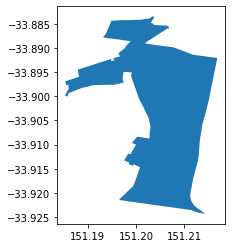

In [51]:
# let's isolate the sa2s that make up our case study areas of Redfern/Waterloo
red_wat_gdf = corr_test11[(corr_test11.SA2_MAIN16==117031335)
                          |(corr_test11.SA2_MAIN16==117031338)]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
red_wat_simple = red_wat_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
red_wat_sgdf=red_wat_simple.dissolve(by="SA4_NAME16")
red_wat_sgdf.plot()

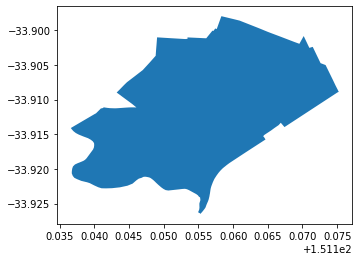

In [52]:
# let's isolate the sa2s that make up our case study areas of  Marrickville
marr_gdf = corr_test11[(corr_test11.SA2_MAIN16==117021326)]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
marr_simple = marr_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
marr_sgdf=marr_simple.dissolve(by="SA4_NAME16")
marr_sgdf.plot()

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


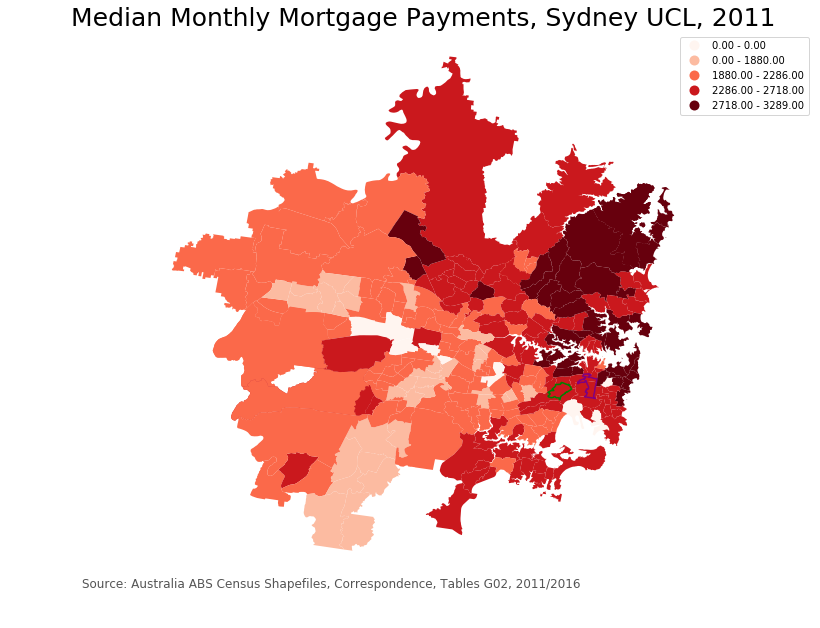

In [56]:
# Create map of Sydney UCL 
figure, ax = plt.subplots(figsize=(14,10))
base = reg_med11.plot(column="Median_mortgage_repay_monthly", scheme = "fisher_jenks", k = 5, 
                       legend=True, ax=ax, cmap="Reds")

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()

ax.set_title('Median Monthly Mortgage Payments, Sydney UCL, 2011', fontdict={'fontsize':25})

ax.annotate('Source: Australia ABS Census Shapefiles, Correspondence, Tables G02, 2011/2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

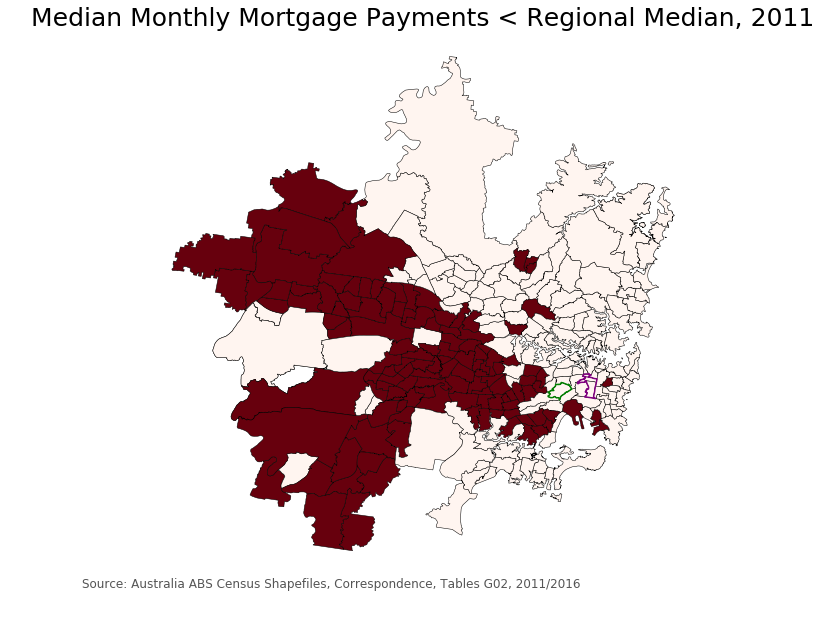

In [58]:
figure, ax = plt.subplots(figsize=(14,10))
base = reg_med11.plot(column="mort_dv", ax=ax, cmap="Reds", edgecolor='Black',linewidth=.5)

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()


ax.set_title('Median Monthly Mortgage Payments < Regional Median, 2011', fontdict={'fontsize':25})


ax.annotate('Source: Australia ABS Census Shapefiles, Correspondence, Tables G02, 2011/2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

Text(0.5, 1, 'Median Weekly Rent Payments, Greater Sydney, 2011')

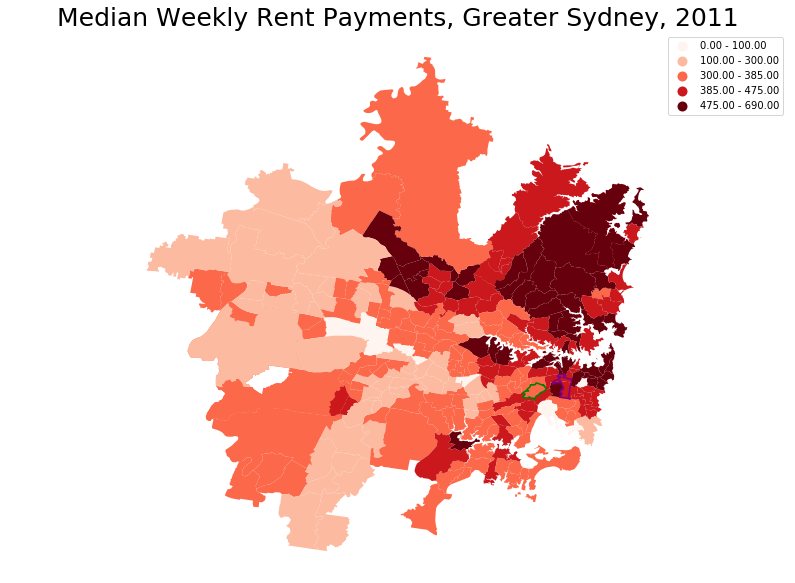

In [59]:
figure, ax = plt.subplots(figsize=(14,10))
base = reg_med11.plot(column="Median_rent_weekly", 
                scheme = "fisher_jenks", 
                k = 5, 
                legend=True, 
                ax=ax, 
                cmap="Reds")

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()

ax.set_title('Median Weekly Rent Payments, Greater Sydney, 2011', fontdict={'fontsize':25})

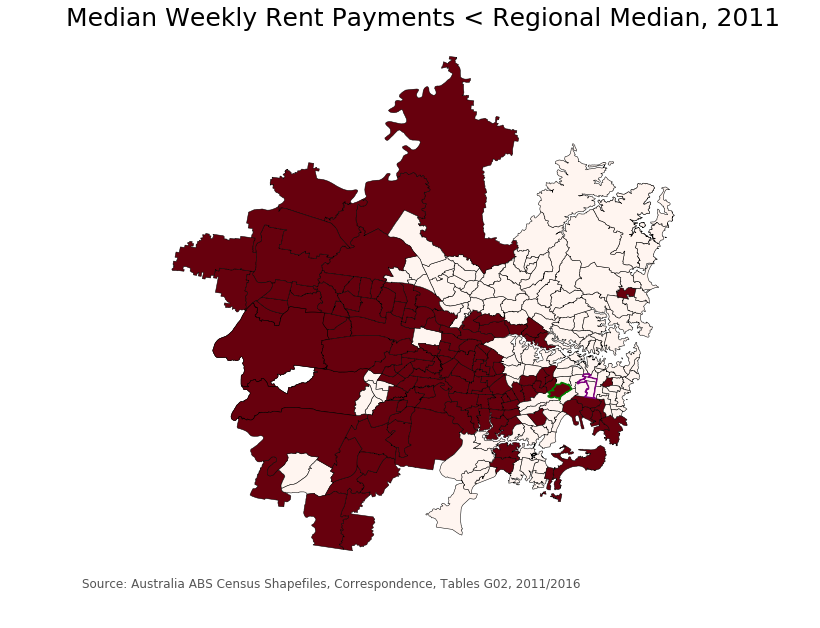

In [60]:
figure, ax = plt.subplots(figsize=(14,10))
base = reg_med11.plot(column="rent_dv", ax=ax, cmap="Reds",edgecolor='Black',linewidth=.5)

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()


ax.set_title('Median Weekly Rent Payments < Regional Median, 2011', fontdict={'fontsize':25})

ax.annotate('Source: Australia ABS Census Shapefiles, Correspondence, Tables G02, 2011/2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

# Create an output CSV to apply to master document for typology sets

In [66]:
output_csv = reg_med11[['SA2_MAINCODE_2016','region_id','RATIO','red_wat_dv','marrick_dv','mort_dv','rent_dv']]
output_csv.to_csv('2011_UCL_MortRent.csv')

In [65]:
reg_med11.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 270 entries, 301 to 588
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   SA2_MAINCODE_2016              270 non-null    int64   
 1   Median_mortgage_repay_monthly  270 non-null    float64 
 2   Median_rent_weekly             270 non-null    float64 
 3   red_wat_dv                     270 non-null    int32   
 4   marrick_dv                     270 non-null    int32   
 5   geometry                       270 non-null    geometry
 6   region_id                      270 non-null    float64 
 7   RATIO                          270 non-null    float64 
 8   mort_dv                        270 non-null    int32   
 9   rent_dv                        270 non-null    int32   
dtypes: float64(4), geometry(1), int32(4), int64(1)
memory usage: 29.0 KB
